### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# MiDaS

*Author: Intel ISL*

**The MiDaS v2 model for computing relative depth from a single image.**

<img src="https://pytorch.org/assets/images/midas_samples.png" alt="alt" width="50%"/>

In [1]:
import torch
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
midas.eval()

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to /root/.cache/torch/hub/master.zip


Loading weights:  None


Downloading: "https://github.com/facebookresearch/WSL-Images/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth


Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2/model-f46da743.pt" to /root/.cache/torch/hub/checkpoints/model-f46da743.pt


MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

will load the MiDaS v2 model. The model expects 3-channel RGB images of shape ```(3 x H x W)```. Images are expected to be normalized using
`mean=[0.485, 0.456, 0.406]` and `std=[0.229, 0.224, 0.225]`. 
`H` and `W` need to be divisible by `32`. For optimal results `H` and `W` should be close to `384` (the training resolution). 
We provide a custom transformation that performs resizing while maintaining aspect ratio. 

### Model Description

[MiDaS](https://arxiv.org/abs/1907.01341) computes relative inverse depth from a single image. The model has been trained on 5 distinct dataset using 
multi-objective optimization to ensure high quality on a wide range of inputs.


### Example Usage

Download an image from the PyTorch homepage

In [2]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [ ]:
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7f46931c5908>)

In [3]:
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master


Loading weights:  None


MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

Load transforms to resize and normalize the image

In [4]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.default_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls

gdrive	sample_data


In [7]:
!cp ./gdrive/'My Drive'/YoloV3_data/YOLOV3_customdata.zip .

In [8]:
!unzip ./YOLOV3_customdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: YOLOV3_customdata/customdata/images/Ka.jpg  
  inflating: YOLOV3_customdata/customdata/images/a41.jpg  
  inflating: YOLOV3_customdata/customdata/images/majdoor_128.jpg  
  inflating: YOLOV3_customdata/customdata/images/8c7b72f0.jpg  
  inflating: YOLOV3_customdata/customdata/images/mask_11.jpg  
  inflating: YOLOV3_customdata/customdata/images/Dimg035.jpg  
  inflating: YOLOV3_customdata/customdata/images/K227.jpg  
  inflating: YOLOV3_customdata/customdata/images/Bimg_73.jpg  
  inflating: YOLOV3_customdata/customdata/images/PImage29.jpg  
  inflating: YOLOV3_customdata/customdata/images/african-american-woman-wearing-hardhat-and-safety-vest-picture-id485445478.jpg  
  inflating: YOLOV3_customdata/customdata/images/majdoor_95.jpg  
  inflating: YOLOV3_customdata/customdata/images/construction-worker-working-under-blue-skies.jpg  
  inflating: YOLOV3_customdata/customdata/images/HV_007.jpg  
  inflating: YOLOV3_customdata

In [9]:
import os
import numpy as np

In [10]:
!mkdir midas_out

In [11]:
!ls

gdrive	midas_out  sample_data	YOLOV3_customdata  YOLOV3_customdata.zip


In [12]:
imgs_path = "./YOLOV3_customdata/customdata/images"
imgpaths = [f for f in os.listdir(imgs_path)]

In [13]:
for idx, img_name in enumerate(imgpaths):
  filename = os.path.join(imgs_path,img_name)
  print(">>>>>>  ",filename, "    >>>>   ", idx)
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  input_batch = transform(img).to(device)
  with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
  output = prediction.cpu().numpy()
  plt.imsave(os.path.join("./midas_out/",img_name), output)


>>>>>>   ./YOLOV3_customdata/customdata/images/images (33).jpg     >>>>    0
>>>>>>   ./YOLOV3_customdata/customdata/images/Himage_011.jpg     >>>>    1
>>>>>>   ./YOLOV3_customdata/customdata/images/HVB_Img_007.jpg     >>>>    2
>>>>>>   ./YOLOV3_customdata/customdata/images/HM_Img_003.jpg     >>>>    3
>>>>>>   ./YOLOV3_customdata/customdata/images/sticking-to-the-plan-picture-id501818498.jpg     >>>>    4
>>>>>>   ./YOLOV3_customdata/customdata/images/C14.jpg     >>>>    5
>>>>>>   ./YOLOV3_customdata/customdata/images/VB_Img_002.jpg     >>>>    6
>>>>>>   ./YOLOV3_customdata/customdata/images/Himage_179.jpg     >>>>    7
>>>>>>   ./YOLOV3_customdata/customdata/images/Q59.jpg     >>>>    8
>>>>>>   ./YOLOV3_customdata/customdata/images/image3.jpg     >>>>    9
>>>>>>   ./YOLOV3_customdata/customdata/images/HVM_Img_014.jpg     >>>>    10
>>>>>>   ./YOLOV3_customdata/customdata/images/Dimg040.jpg     >>>>    11
>>>>>>   ./YOLOV3_customdata/customdata/images/Jimg005.jpg     >>>>    12


In [14]:
!zip -r ./midas_depth_data.zip ./midas_out/*

  adding: midas_out/01-prince-boots - Copy.jpg (deflated 47%)
  adding: midas_out/026f0ffddc.jpg (deflated 5%)
  adding: midas_out/032620_LS_covid-masks_inline-680.jpg (deflated 9%)
  adding: midas_out/046acbc8e1.jpg (deflated 5%)
  adding: midas_out/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg (deflated 19%)
  adding: midas_out/051fa0f9fd.jpg (deflated 7%)
  adding: midas_out/05a207d8-6378-43a2-9d1e-431ca7a944e4-unnamed - Copy.jpg (deflated 17%)
  adding: midas_out/088b63b347a4e40f0777df612ebe490a.jpg (deflated 42%)
  adding: midas_out/0983a70ffe.jpg (deflated 5%)
  adding: midas_out/0b59d3bd16.jpg (deflated 5%)
  adding: midas_out/101.jpg (deflated 14%)
  adding: midas_out/102.jpg (deflated 12%)
  adding: midas_out/103.jpg (deflated 18%)
  adding: midas_out/104.jpg (deflated 15%)
  adding: midas_out/105.jpg (deflated 7%)
  adding: midas_out/106.jpg (deflated 7%)
  adding: midas_out/107.jpg (deflated 15%)
  adding: midas_out/10e3431da9.jpg (deflated 4%)

In [15]:
!cp ./midas_depth_data.zip ./gdrive/'My Drive'/YoloV3_data/Depth_Data_Midas

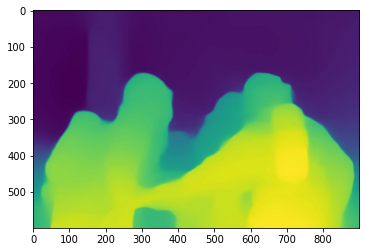

In [22]:
img = cv2.imread('./midas_out/Himage_022.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()